# Prediccion de Precios de Carros

Creacion de un modelo de Machine Learning para predecir los precios de los carros en el mercado estadounidense. El objetivo es ayudar a nuevos integrantes a comprender factores de precios importantes en este mercado.

# Seccion 1. Analisis y exploracion de los datos

## Librerias

In [212]:
#pip install adjustText

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gestion de advertencias

In [214]:
import warnings

# ignora advertencias sobre funcionalidades que se van a dejar de usar
#warnings.simplefilter(action='ignore', category=FutureWarning)

# ignora advertencias sobre problemas en tiempo de ejecucion
#warnings.filterwarnings('ignore', category=RuntimeWarning)

## Cargar datos

In [215]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [216]:
# resumen por variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

> Las 26 variables estan libres de valores faltantes. Existen 205 registros

## Entendiendo las variables predictoras

### **Symboling**

Hace referencia al riesgo del auto y va en una escala de -2 a 3,siendo el -2 menos riesgoso y 3 mas riesgoso.

In [217]:
# Categorias de la variable Symboling
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [218]:
# porcentaje de las diferentes categorias de symboling
df['symboling'].value_counts(normalize=True)*100

 0    32.682927
 1    26.341463
 2    15.609756
 3    13.170732
-1    10.731707
-2     1.463415
Name: symboling, dtype: float64

- La mayoria de los carros son 0, 1, 2, es decir con un riesgo considerable

- Son pocos los carros con bajo riesgo (-2)

### **Aspiration**

Es una propiedad del motor (de combustion interna) que muestra si la ingesta de oxigeno es estandar (presion atmosferica) o mediante turbocompresor (entrada de oxigeno a presion)

In [219]:
# categorias de la variable aspiration
df['aspiration'].value_counts(normalize=True)*100

std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64

- El 81.9% de los carros son de ingesta de oxigeno estandar
- El 18.1% son de turbocompresor

### **Drivewheel**

Hace referencia a la rueda de traccion del carro: rueda delantera (frontwheel), rueda trasera (rear wheel) o traccion en las cuatro ruedas (four-wheel drive).

In [220]:
df['drivewheel'].value_counts(normalize=True)*100

fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64

- El 58.3% de los carros son de traccion delantera
- El 37.1% son de traccion trasera
- El 4.4% son de traccion en las 4 ruedas.

### **Wheelbase**

Es la distancia entre el centro de las ruedas delanteras y traseras.

/home/jbernal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


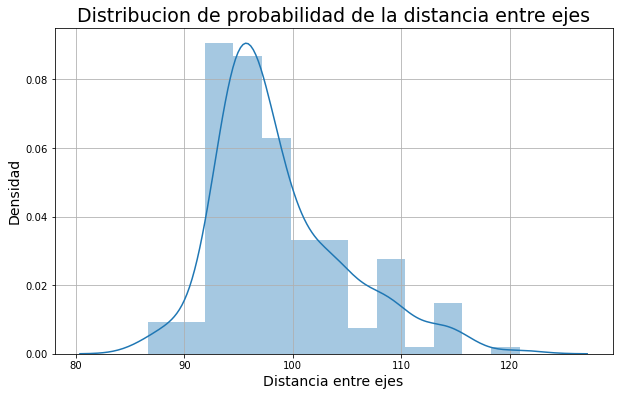

In [221]:
# como es una variable numerica, veamos su distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['wheelbase'])
plt.grid(True)
plt.xlabel('Distancia entre ejes', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Distribucion de probabilidad de la distancia entre ejes', fontsize= 19);

- La mayoria de los carros tienen una distancia entre ejes entre 92.5 y 97.5 

### **Curbweight**

Peso del carro sin ocupantes ni equipajes

/home/jbernal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


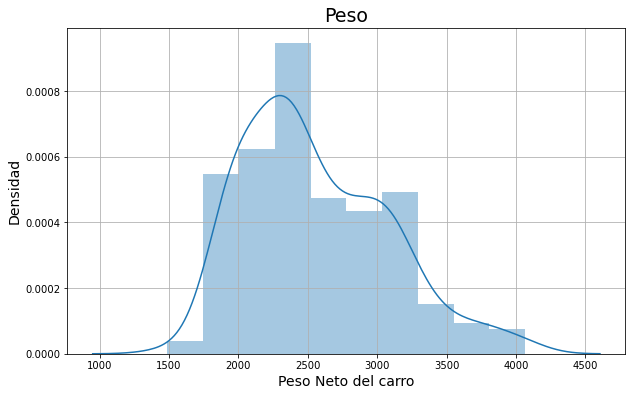

In [222]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['curbweight'])
plt.grid(True)
plt.xlabel('Peso Neto del carro', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Peso', fontsize= 19);

- La mayoria de los carros pesan entre 2000 y 2500.

### **Stroke**

Es el volumen del motor (distancia recorrida por el piston en cada ciclo)

/home/jbernal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


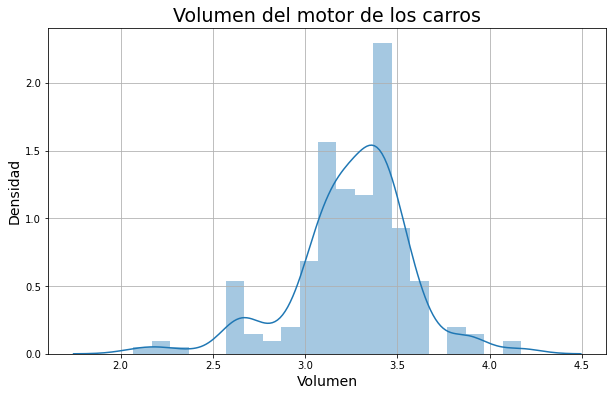

In [223]:
# distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['stroke'])
plt.grid(True)
plt.xlabel('Volumen', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Volumen del motor de los carros', fontsize= 19);

- Hay una gran cantidad de carros con volumen de motor de 3.4.

### **Compression ration**

Relacion de volumen de la camara de compresion de mayor a menor capacidad

/home/jbernal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


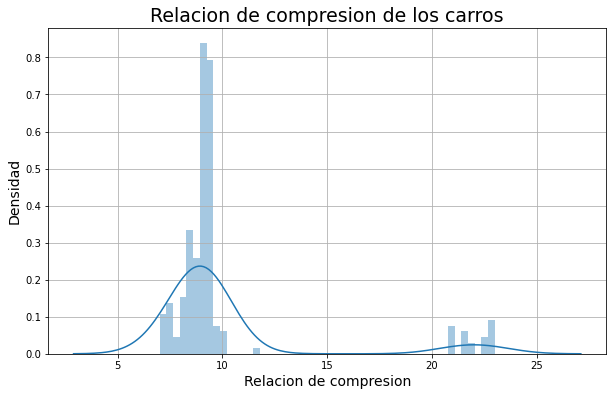

In [224]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['compressionratio'])
plt.grid(True)
plt.xlabel('Relacion de compresion', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Relacion de compresion de los carros', fontsize= 19);

- La mayoria de los carros tienen una relacion de compresion de 7.5 a 10.0
- Hay unos pocos con relacion de compresion entre 20 y 22.5
- En estos dos rangos se encuentran todos los carros.

## Entendiendo variable objetivo

Estamos interesados en predecir el precio de los carros, por tanto, la variable objetivo es *Price*.  Vamos a visualizar la variable en un histograma y en un grafico de densidad.

/home/jbernal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


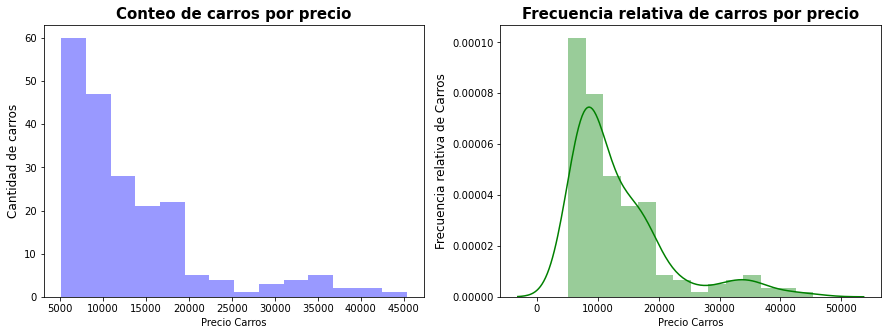

In [225]:
# tamano de los graficos y cantidad de grilla
fig, ax= plt.subplots(1,2,figsize=(15,5))

# Histograma
sns.distplot(df['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Precio Carros')
ax[0].set_ylabel('Cantidad de carros',size=12)
ax[0].set_title('Conteo de carros por precio',size=15,weight="bold")

# Grafico de densidad
sns.distplot(df['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Precio Carros')
ax[1].set_ylabel('Frecuencia relativa de Carros', size=12)
ax[1].set_title('Frecuencia relativa de carros por precio', size=15, weight='bold');

- El precio tiene un sesgo positivo. Sin embargo, la mayoria de los carros tienen precios bajos.

- Entre 105 y 107 carros tienen un precio inferior a 10.000. Representan mas del 50%.

- Entre 68 y 70 carros tienen precio entre 10.000 y 20.000. Representan cerca del 35%.

- Alrededor del 85% de los carro tienen un precio entre 5.000 y 20.000 dolares.

- El grafico derecho sugiere que hay 2 distribuciones, una para carros con precios entre 5.000 y 25.000 y otra para carros de mas de 25.000.

veamos el grafico de boxplot de la variable Price para visualizar los outliers.

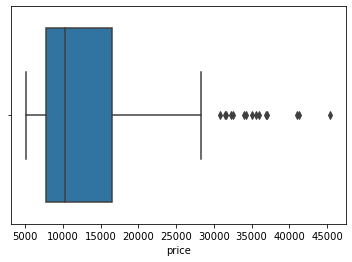

In [226]:
sns.boxplot(x=df['price']);

- Gran parte de los puntos que representan la segunda distribucion se consideran outliers.

# Seccion 2. Exploracion de los Datos

## Relacion entre variables

Veamos como se relacionan las variables predictoras con la variable objetivo.

In [227]:
# seleccionar variables predictoras numericas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Eliminamos la variable *symboling* debido a que es de tipo categorica y *car_ID* ya que es un indice de los registros

In [228]:
df_numeric = df_numeric.drop(['symboling', 'car_ID'], axis=1)
df_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Cruzemos todas las variables entre si mediante graficos de dispersion para observar el tipo de relacion con la variable objetivo.

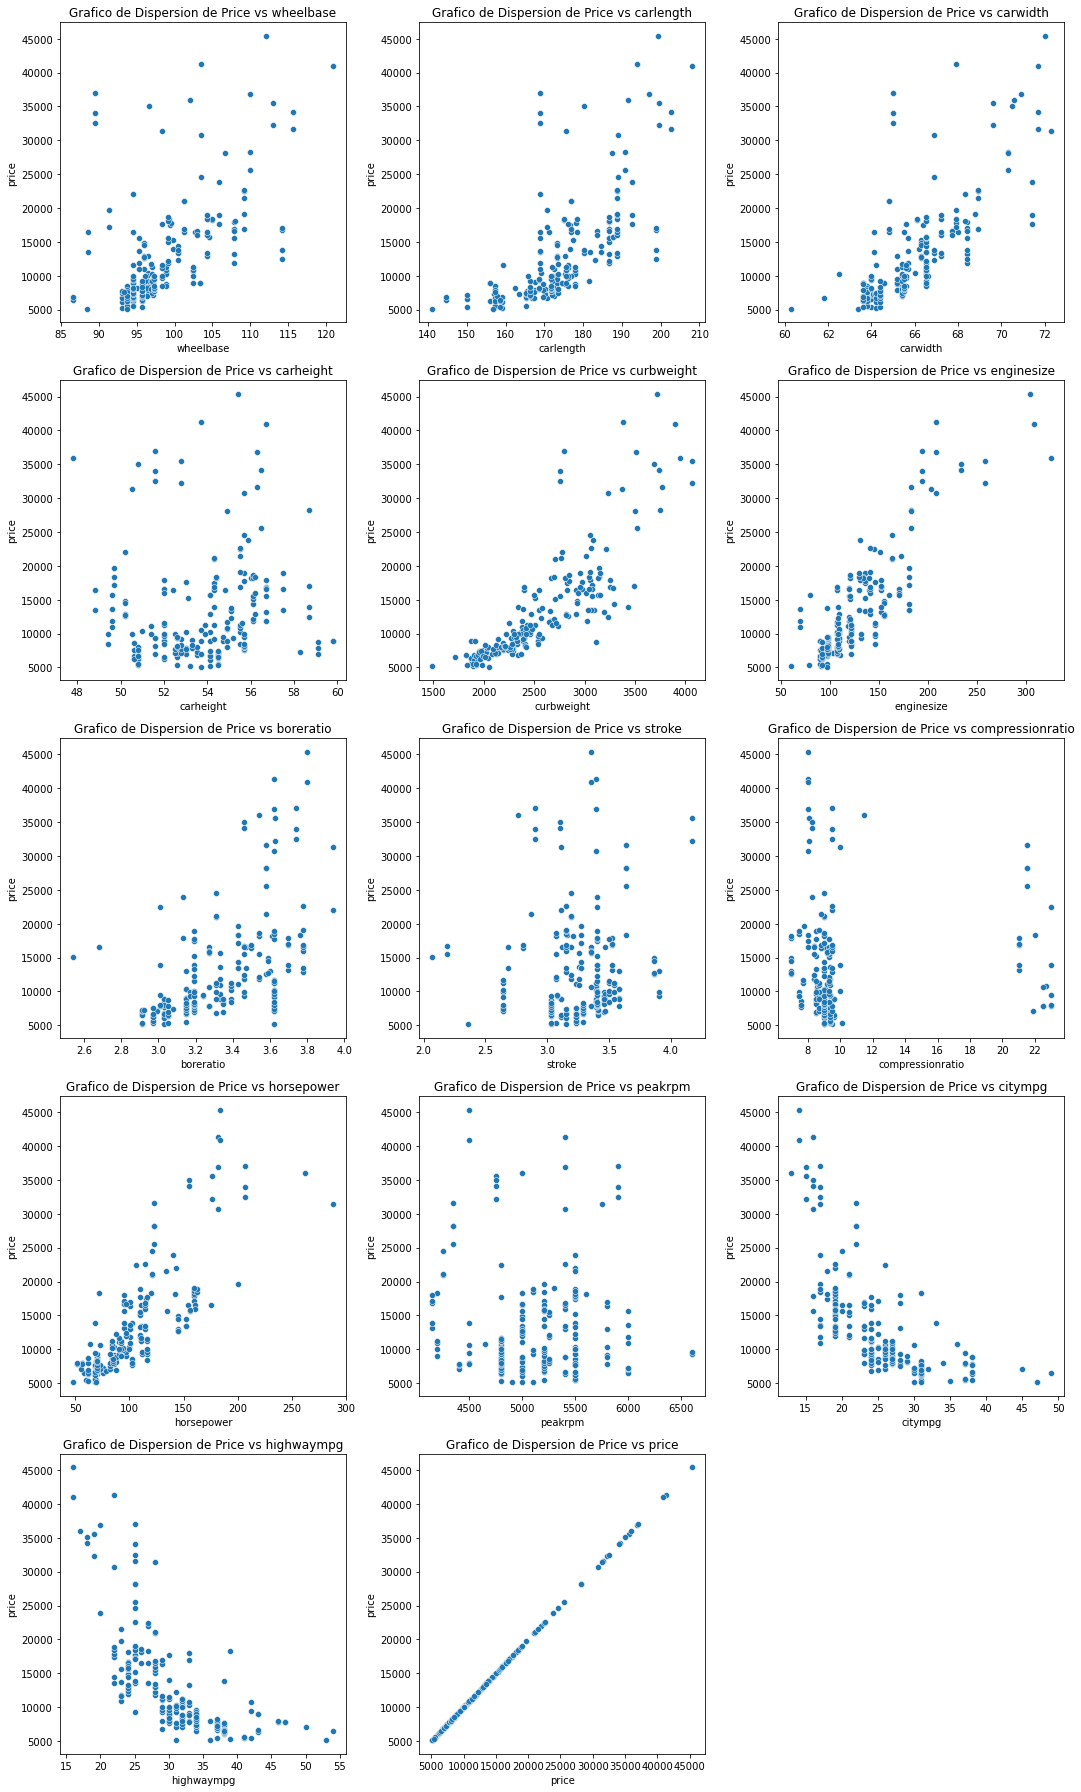

In [229]:
# Número de columnas predictoras
num_cols = len(df_numeric.columns) - 1
# Número de filas necesarias para una grilla de 3 columnas
num_rows = (num_cols + 2) // 3  
# Crear una grilla de subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows)) 

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):  
    # grafico de dispersion de cada variable objetivo con price    
    sns.scatterplot(x=df_numeric[col], y=df_numeric['price'], ax=axes[i])
    axes[i].set_title(f'Grafico de Dispersion de Price vs {col}')

# Eliminar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Las variables que presentan una relacion lineal con *Price* son: ancho del carro (carwidth), peso en vacio (curbweight), tamaño del motor (enginesize), caballos de fuerza (horsepower), perforacion (boreration) y mpg en ciudad (citympg) 

- Las demas variables no tienen relaciones lineales fuertes con el precio o ningun tipo de relacion.
 

## Matriz de Correlacion

Veamos, analiticamente, la relacion lineal entre las variables mediante la matriz de correlacion 

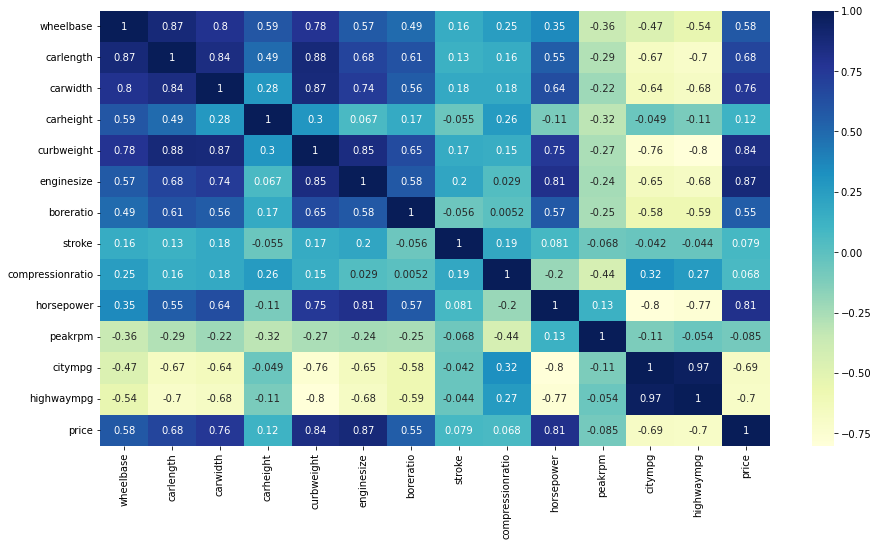

In [230]:
corr = df_numeric.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu');

### Conclusiones:

**1.- Variable dependiente con las variables independientes**
> Las variables con correlacion positiva con Price son enginesize, curbweight, horsepower y carwidth. Todas estas variables  representan el tamano, peso y potencia del motor del carro.

> Las variables con correlacion negativa  con Price son citympg y highwaympg. Esto sugiere que los carros con alto kilometraje pueden caer en la categoria de 'Economicos'. Es decir, los carros de bajo precio tienen en su mayoria mpg altos.

**2.- Correlacion entre variables independientes**
> Debemos tener en cuenta que muchas variables independientes estan correlacionadas. Esto indica un problema de multicolinealidad que podria perjudicar el rendimiento del modelo. Variables como wheelbase, carlength, curbweight, enginesize, entre otros son medidas de tamaño y peso y estan correlacionados positivamente.

# Seccion 3: Limpieza de Datos

## Conversion de variables

In [231]:
# veamos un resumen de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

La variable *symboling* es de tipo numerica. Sin embargo, ya vimos que es una variable categorica por lo que debemos cambiar su tipo. 

In [232]:
# convertir symboling a categorica
df['symboling'] = df['symboling'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Arreglar valores de variables

Veamos los nombres de los carros *CarName*

In [233]:
df['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

Vamos a obtener solamente el nombre de la marca de carro. Para ello, creamos una nueva columna y obtendremos solo la primera palabra de cada valor que corresponde a la marca.

In [234]:
name_car = df['CarName'].apply(lambda x: x.split(' ')[0])
name_car[:5]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

Agregamos la nueva columna al DataFrame y verificamos los valores de marcas unicas.

In [235]:
df['car_company'] = name_car
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

Observamos que hay marcas de carros duplicadas como *toyota* y *toyouta*. Vamos a corregir la ortografia de las marcas 

In [236]:
# volkswagen
df.loc[(df['car_company']=='vw')|(df['car_company']=='vokswagen'), "car_company"] = "volkswagen"

# porsche
df.loc[(df['car_company']=='porcshce'), 'car_company'] = 'porsche'

# toyota
df.loc[(df['car_company']=='toyouta'), 'car_company'] = 'toyota'

# nissan
df.loc[(df['car_company']=='Nissan'), 'car_company'] = 'nissan'

# mazda 
df.loc[(df['car_company']=='maxda'), 'car_company'] = 'mazda'

# veriquemos nuevamente los valores unicos
df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

Ya estan completamente corregidos. Ahora, eliminamos la columna *CarName* ya que no nos proporcina informacion de interes

In [237]:
# eliminar CarName
df = df.drop('CarName', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# Seccion 4: Preparacion de los datos

Separamos las variables predictoras y la variable objetivo

In [238]:
# variables predictoras
X = df.drop(columns=['price', 'car_ID'])

# variable objetivo
y = df['price']

In [239]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [240]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

Seleccionamos del grupo de variables predictoras, las variables categoricas

In [241]:
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


Hay 11 variables categoricas que son predictoras. Ahora creamos variables ficticias para cada variable categorica seleccionada

In [242]:
# variables ficticias de las categoricas
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

/home/jbernal/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


De las 11 variables categoricas, obtuvimos un total de 55 variables ficticias. Ahora eliminamos las variables categoricas del DataFrame

In [243]:
X = X.drop(columns=cars_categorical)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


Vemos que quedan 13 variables de tipo numerica en las variables predictoras. Ahora, vamos a juntar las variables predictoras que quedaron con las variables ficticias correspondiente a las categoricas.

In [244]:
dfX = pd.merge(X, cars_dummies, left_index=True, right_index=True)
dfX.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [245]:
# nombre de las columnas
dfX.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


## Escalando las variables

Escalamos las variables para facilitar la interpretacion de los coeficientes. Con esto buscamos que las variables posean valores entre -1 y 1.

In [246]:
# libreria para escalar
from sklearn.preprocessing import scale

# almacenar los nombres de las columnas en una variable para recuperarlos nuevamente
cols = dfX.columns
# al escalar el df se convierte en un array de numpy
dfX_scaled = pd.DataFrame(scale(dfX))
# recuperamos los nombres de las variables
dfX_scaled.columns = cols

dfX_scaled.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


Verifiquemos que todas las variables numericas tengan media de cero o cercano a cero y desviacion estandar de 1

In [247]:
dfX_scaled.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,...,-6.228080e-17,-4.947262e-16,-5.524037e-17,3.076130e-16,-1.252386e-16,-1.437874e-16,8.529762e-17,-7.251652e-16,-6.452833e-16,3.552714e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
25%,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
50%,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
75%,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
max,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,...,3.223180e+00,4.199567e+00,5.318432e+00,6.324555e+00,1.007472e+01,5.759051e+00,4.010403e+00,2.325134e+00,4.010403e+00,4.199567e+00


## Datos de entrenamiento y de prueba
Ahora, dividimos los datos en dos grupos: entrenamiento y de prueba

In [248]:
# libreria para dividir los datos
from sklearn.model_selection import train_test_split

# divimos los datos en 70% de entrenamiento y 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(dfX_scaled, y, train_size=0.7, test_size=0.3, random_state=100)


# Seccion 6: Primer modelo

Dado que la variable dependiente *Price* parece estar relacionado lienalmente con la mayoria de las variables predictoras, vamos a utilizar la Regresion Lineal. Creamos un modelo de regresion lineal que utilice todas las variables.

In [249]:
# librerias para crear un modelo de regresion lineal
import statsmodels.api as sm

# agregar constante a las caracteristicas de entrenamiento y prueba que representa el intercepto
X_train_c = sm.add_constant(X_train, has_constant='add')
X_test_c = sm.add_constant(X_test, has_constant='add')

# entrenamos el modelo OLS con datos de entrenamiento
lm_1 = sm.OLS(y_train, X_train_c).fit()
# resumen del modelo
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     53.29
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           9.90e-47
Time:                        09:06:36   Log-Likelihood:                -1218.3
No. Observations:                 143   AIC:                             2561.
Df Residuals:                      81   BIC:                             2744.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.321e+04    152.974     86.331      0.000    1.29e+04    1.35e+04
wheelbase               1288.0479    778.616      1.654      0.102    -261.155    2837.250
carlength              -1049.5521    751.818     -1.396      0.167   -2545.434     446.330
carwidth                1688.3456    675.620      2.499      0.014     344.075    3032.617
carheight              -1259.0407    428.079     -2.941      0.004   -2110.784    -407.297
curbweight              2420.2709    965.732      2.506      0.014     498.767    4341.775
enginesize              1.163e+04   2683.630      4.332      0.000    6286.753     1.7e+04
boreratio              -4850.3895   1355.060     -3.579      0.001   -7546.533   -2154.246
stroke                 -1134.2409    490.562     -2.312      0.023   -2110.305    -158.177
compressionratio       -2569.5196   2540.603     -1.011      0.315   -7624.523    2485.484
horsepower              -973.6448   1303.243     -0.747      0.457   -3566.691    1619.401
peakrpm                 1356.8143    385.453      3.520      0.001     589.883    2123.745
citympg                 -261.8185   1068.569     -0.245      0.807   -2387.935    1864.298
highwaympg               744.2396    972.203      0.766      0.446   -1190.139    2678.618
symboling_-1             736.3344    544.747      1.352      0.180    -347.540    1820.209
symboling_0              801.8006    992.668      0.808      0.422   -1173.296    2776.898
symboling_1              702.3602    946.107      0.742      0.460   -1180.096    2584.816
symboling_2              647.7508    761.153      0.851      0.397    -866.705    2162.207
symboling_3              350.5586    736.265      0.476      0.635   -1114.377    1815.495
fueltype_gas           -1206.8356   1285.392     -0.939      0.351   -3764.362    1350.690
aspiration_turbo        1012.4845    428.196      2.365      0.020     160.508    1864.461
doornumber_two          -233.3860    274.872     -0.849      0.398    -780.294     313.522
carbody_hardtop         -769.2804    444.608     -1.730      0.087   -1653.911     115.350
carbody_hatchback      -1836.4099    815.162     -2.253      0.027   -3458.326    -214.494
carbody_sedan          -1661.6282    912.505     -1.821      0.072   -3477.227     153.971
carbody_wagon           -912.5663    625.685     -1.459      0.149   -2157.484     332.351
drivewheel_fwd           -92.8944    447.755     -0.207      0.836    -983.787     797.998
drivewheel_rwd           442.8166    638.503      0.694      0.490    -827.604    1713.237
enginelocation_rear     1156.6586    401.634      2.880      0.005     357.534    1955.784
enginetype_dohcv         550.5574    443.436      1.242      0.218    -331.741    1432.856
enginetype_l              64.5972    350.535      0.184      0.854    -632.857  

Evaluamos el desempeno del modelo mediante el calculo de las metricas que se hara a traves de la siguiente funcion:

In [250]:
from sklearn.metrics import r2_score, mean_squared_error

def Metricas_Modelo(model_train, model_name, X_train, y_train, X_test, y_test, descrip=' '):
    '''
    Funcion que permite calcular R-cuadrado y RMSE del modelo entrenado que se le pasa
    tanto para los datos de entrenamiento como los de prueba. Los parametros solicitados
    son:
    - model_train: objeto que contiene el modelo entrenado con los datos de entrenamiento
    - model_name: nombre del modelo para distinguirlo del resto
    - X_train: variables predictoras de entrenamiento con intercepto
    - y_train: variable objetivo de entrenamiento
    - X_test: variables predictoras de prueba con intercepto
    - y_test: variable objetivo de prueba
    - descrip: mensaje para describir el modelo
    '''
    
    # generamos la prediccion para datos de entrenamiento
    #X_train_c = sm.add_constant(X_train)
    pred_train = model_train.predict()
    
    # metricas para los datos de entrenamiento
    r_train = r2_score(y_train, pred_train)
    MSE_train = mean_squared_error(y_train, pred_train)
    RMSE_train = (MSE_train)**0.5
    
    # generamos prediccion con datos de prueba
    pred_test = model_train.predict(X_test)
    
    # metricas para los datos de prueba
    r_test = r2_score(y_test, pred_test)
    MSE_test = mean_squared_error(y_test, pred_test)
    RMSE_test = (MSE_test)**0.5
    
    # creamos un diccionario con las metricas del modelo
    dict_metrics = {
        'Modelo': model_name,
        'R-cuadrado_train': [r_train.round(3)],
        'RMSE_train': [RMSE_train.round(3)],
        'R-cuadrado_test': [r_test.round(3)],
        'RMSE_test': [RMSE_test.round(3)],
        'Descripcion': descrip
    }
    
    # retornamos un dataframe con las metricas del modelo
    return pd.DataFrame(dict_metrics)

Calculamos las metricas, tanto para datos de entrenamiento como de prueba, del modelo con la funcion *Metrica_Modelo* 

In [251]:
metricas_modelo1 = Metricas_Modelo(lm_1, 'Modelo 1', X_train_c, y_train, X_test_c, y_test, 'Todas las variables')
metricas_modelo1

,Modelo,R-cuadrado_train,RMSE_train,R-cuadrado_test,RMSE_test,Descripcion
0,Modelo 1,0.976,1213.002,0.701,4574.108,Todas las variables


> El alto valor de R cuadrado en el entrenamiento y su amplia diferencia con el R cuadrado de los datos de prueba indica un sobreajuste del modelo. Vamos a utlizar la eliminacion recursiva de caracteristicas para reducir la dimensionalidad y asi reducir el overfitting.

# Seccion 7: Seleccion de variables usando RFE

Vamos a determinar el numero optimo de variables. Recordemos que tenemos 68 variables predictoras. Lo que hacemos es crear modelos con diferentes variables predictoras seleccionadas por RFE iniciando en 4 hasta llegar a 68 variables y a cada modelo se calcula las respectivas metricas. Todo ello, lo haremos mediante la siguiente funcion.

In [252]:
from sklearn.feature_selection import RFE
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression

def Modelos_Metricas_RFE(n_inicial, n_final, X_train, y_train, X_test, y_test):
    '''
    Calculo de las metricas para modelos de regresion lineal con diferentes cantidades
    de variables predictoras. Los parametros requeridos son:
    n_inicial: cantidad de caracteristicas para iniciar
    n_final: cantidad de caracteristicas para finalizar
    X_train: Caracteristicas de entrenamiento
    y_train: variable objetivo de entrenamiento
    X_test: Caracteristicas de prueba
    y_test: variable objetivo de prueba
    '''
    
    for n_features in  range(n_inicial, n_final):
        
        # creamos el modelo
        lm = LinearRegression()
        # especificamos la cantidad de variables en RFE
        rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
        # ajustar el modelo RFE con n variables
        rfe_n.fit(X_train, y_train)
        # guardamos variables seleccionadas por rfe_n
        col_n = X_train.columns[rfe_n.support_]
        # seleccionamos los datos de entrenamiento y de prueba para las n variables seleccionadas
        X_train_rfe_n = X_train[col_n]
        X_test_rfe_n = X_test[col_n]
       
        # agrega una constante al modelo que representa el intercepto
        X_train_rfe_n = sm.add_constant(X_train_rfe_n)
        X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
        # entrenamos un nuevo modelo con los datos de entrenamiento
        lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
        
         
        if (n_features - n_inicial) == 0: 
            Modelos_RFE = Metricas_Modelo(lm_n, f'{n_features} variables', X_train_rfe_n, y_train, X_test_rfe_n, y_test, n_features)
        else:
            Modelos_RFE_s = Metricas_Modelo(lm_n,f'{n_features} variables' , X_train_rfe_n, y_train, X_test_rfe_n, y_test, n_features)            
            Modelos_RFE = pd.concat([Modelos_RFE, Modelos_RFE_s], ignore_index=True)
            
    return Modelos_RFE
        

Generamos las metricas de cada modelo entrenado inicialmente con 4 variables hasta 66, secuencialmente mediante la funcion *Modelos_Metricas_RFE*

In [253]:
df_RFE = Modelos_Metricas_RFE(4, 66, X_train, y_train, X_test, y_test)
df_RFE

,Modelo,R-cuadrado_train,RMSE_train,R-cuadrado_test,RMSE_test,Descripcion
0,4 variables,0.837,3139.984,0.865,3072.217,4
1,5 variables,0.886,2621.196,0.888,2799.293,5
2,6 variables,0.891,2571.205,0.885,2836.086,6
3,7 variables,0.896,2505.390,0.887,2814.680,7
4,8 variables,0.907,2368.638,0.898,2673.842,8
...,...,...,...,...,...,...
57,61 variables,0.976,1214.254,0.839,3359.549,61
58,62 variables,0.976,1213.937,0.840,3349.895,62
59,63 variables,0.976,1213.202,0.833,3416.081,63
60,64 variables,0.976,1213.112,0.834,3412.677,64


Vamos a graficar R cuadrado y RMSE en funcion de la cantidad de variables para determinar el numero optimo de las mismas para el modelo de regresion lineal.

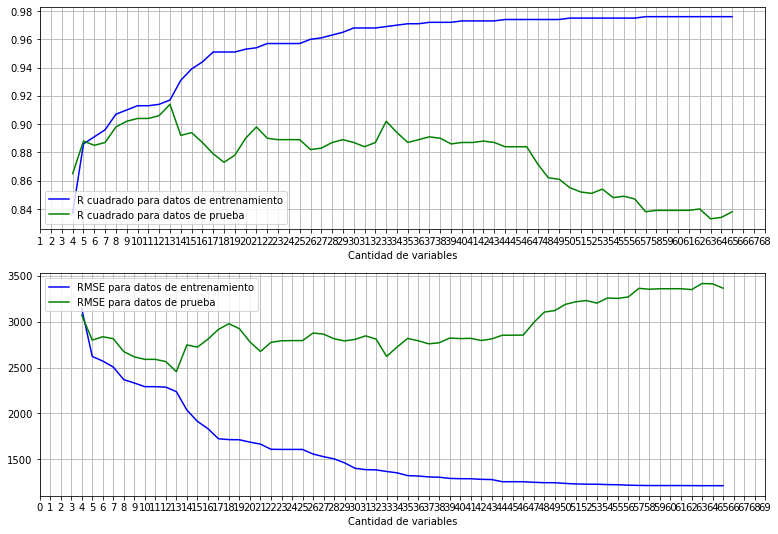

In [254]:
# librerias para personalizar las etiquetas
import matplotlib.ticker as plticker

# grilla
fig, ax = plt.subplots(2, 1, figsize=(13, 9))

# grafico de R cuadrado
ax[0].plot(df_RFE['Descripcion'], df_RFE['R-cuadrado_train'], 'b', label='R cuadrado para datos de entrenamiento')
ax[0].plot(df_RFE['Descripcion'], df_RFE['R-cuadrado_test'], 'g', label='R cuadrado para datos de prueba')
ax[0].set_xlabel('Cantidad de variables')
ax[0].legend(loc='lower left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid(True)
# grafico de RMSE
ax[1].plot(df_RFE['Descripcion'], df_RFE['RMSE_train'], 'b',label="RMSE para datos de entrenamiento")
ax[1].plot(df_RFE['Descripcion'], df_RFE['RMSE_test'], 'g',label="RMSE para datos de prueba")
ax[1].set_xlabel('Cantidad de variables')
ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 70, step=1))
ax[1].grid(True);


> El R cuadrado para datos de prueba alcanza su punto maximo en 13 variables predictoras y en este punto el modelo se generaliza bien ya que el R cuadrado para datos de entrenamiento esta muy cerca del de prueba. El R cuadrado de entrenamiento mas alla de 13 variables sigue aumentando de valor pero el modelo pierde generalizacion.

> El RMSE para datos de prueba es el mas bajo con 13 variables. Mientras que el RMSE para datos de entrenamiento siguen disminuyendo mas alla de 13 variables pero nuevamente existe un equilibrio entre la cantidad de variables seleccionadas y el rendimiento el modelo. Por tanto, nos quedamos con las 13 variables

# Seccion 8: Segundo Modelo

A partir de las 13 variables optimas seleccionadas por RFE, construimos un nuevo modelo de regresion lineal. Primero, vamos a seleccionar las 13 variables.

In [255]:
# objeto de la Regresion
lm = LinearRegression()
# aplicar RFE al modelo anterior
rfe = RFE(estimator=lm, n_features_to_select=13)
# ajustar el modelo a todos los datos de entrenamiento
rfe.fit(X_train, y_train)
# obtener los nombres de las 13 variables optimas
col = X_train.columns[rfe.support_]
# mostras nombre de las 13 variables
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_twelve', 'cylindernumber_two',
       'car_company_bmw', 'car_company_porsche'],
      dtype='object')

Una vez identificadas las 13 variables, vamos a separar sus datos.

In [256]:
# seleccionar datos de prueba y de entrenamiento de las 13 variables
X_train_13 = X_train[col]
X_test_13 = X_test[col]

# agregar una constante al modelo que representa el intercepto
X_train_13 = sm.add_constant(X_train_13, has_constant='add')
X_test_13 = sm.add_constant(X_test_13, has_constant='add')

# mostrar las variables junto a sus valores
X_train_13.head()

,const,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_twelve,cylindernumber_two,car_company_bmw,car_company_porsche
122,1.0,-0.984972,-0.701886,-0.695874,-1.331531,-0.081241,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,-0.158114
125,1.0,1.117866,0.428245,0.579974,2.258638,-0.464834,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,6.324555
166,1.0,-0.891512,-0.492032,-0.695874,-0.332206,-0.560733,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,-0.158114
1,1.0,-0.844782,-0.014566,0.074449,0.519071,-1.839377,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,-0.158114
199,1.0,0.603839,1.157921,0.074449,1.074252,-0.336970,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.141069,-0.201517,-0.158114


Entrenamos un modelo de regresion lineal con los nuevos datos

In [257]:
# entrenamos el modelo con los datos de entrenamiento
lm_2 = sm.OLS(y_train, X_train_13).fit()

Calculamos las metricas del modelo tanto para datos de entrenamiento como de prueba

In [258]:
metricas_modelo2 = Metricas_Modelo(lm_2, 'Modelo 2', X_train_13, y_train, X_test_13, y_test, '13 variables')
metricas_modelo2

,Modelo,R-cuadrado_train,RMSE_train,R-cuadrado_test,RMSE_test,Descripcion
0,Modelo 2,0.917,2237.426,0.914,2455.655,13 variables


Concatenamos este resultado con los del modelo 1 en un dataframe para hacer una mejor comparacion

In [259]:
df_Modelos = pd.concat([metricas_modelo1, metricas_modelo2], ignore_index=True)
df_Modelos

,Modelo,R-cuadrado_train,RMSE_train,R-cuadrado_test,RMSE_test,Descripcion
0,Modelo 1,0.976,1213.002,0.701,4574.108,Todas las variables
1,Modelo 2,0.917,2237.426,0.914,2455.655,13 variables


> Los valores de R cuadrado son altos y cercanos en el modelo 2.

> Los valores de RMSE se acercan mucho entre si lo que indica que el modelo generaliza bien.


## Visualizacion del comportamiento de las predicciones vs valores reales

Vamos a calcular las predicciones del modelo 2 con los datos de entrenamiento y de prueba para luego usarlos visualmente y asi entender mejor el desempeno del modelo

In [260]:
# predicciones para los datos de entrenamiento
y_train_pred_13 = lm_2.predict(X_train_13)
# predicciones para los datos de prueba
y_test_pred_13 = lm_2.predict(X_test_13)

Mediante el siguiente grafico, comparamos las predicciones con los valores reales para ver su comportamiento.

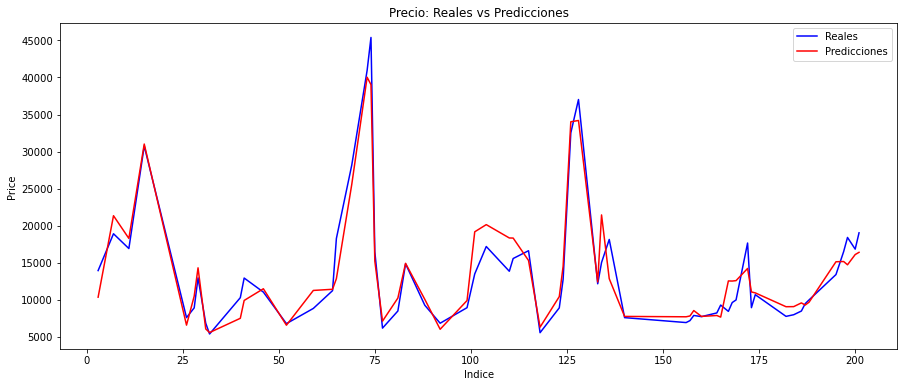

In [261]:
# tamano del grafico
fig, ax = plt.subplots(figsize=(15,6))
# graficos de linea
sns.lineplot(x=y_test.index, y=y_test, label='Reales', color='blue', ax=ax)
sns.lineplot(x=y_test.index, y=y_test_pred_13, label='Predicciones', color='red', ax=ax)
ax.set_title('Precio: Reales vs Predicciones')
ax.set_ylabel('Price')
ax.set_xlabel('Indice');

> Vemos que las predicciones se asemeja mucho a gran parte del comportamiento de los datos reales lo que muestra la calidad del modelo.

# Seccion 9: Evaluar los Supuestos en el segundo Modelo

In [262]:
# importamos las funciones para evaluar los supuestos
%run Funciones_Supuestos.ipynb

## Media de los residuales

In [263]:
Med_residual(lm_2)

-2.1878753665027083e-12


> Vemos que la media de los residuales tiene un valor negativo muy cercano a cero lo que indica que los errores estan normalmente distribuidos cumpliendo con este supuesto.

## Linealidad
Para evaluar la linealidad, inspeccionamos el grafico de valores observados vs predichos. El resultado esperado para que se cumpla la linealidad es que los puntos se distribuyan simetricamente alrededor de una lineal diagonal.

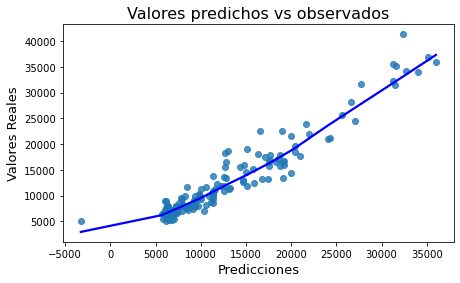

In [264]:
Linealidad(lm_2, y_train)

> La grafica muestra que la mayoria de los puntos estan cerca de la diagonal, sin embargo algunos se alejan lo cual es un problema para la linealidad. La presencia de valores atipicos puede estar afectando la linealidad.


## Homocedasticidad
La homocedasticidad se evalua mediante el grafico de las predicciones vs residuales. El resultado esperado para que se cumpla este supuesto es que los puntos se distribuyan uniformemente alrededor de una linea horizontal ubicada en y = 0. Ademas, podemos aplicar la prueba de Breush Pagan para comprobar de manera analitica que se cumpla este supuesto.


Breush - Pagan Test: p-value= 0.000124266038005712


/home/jbernal/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


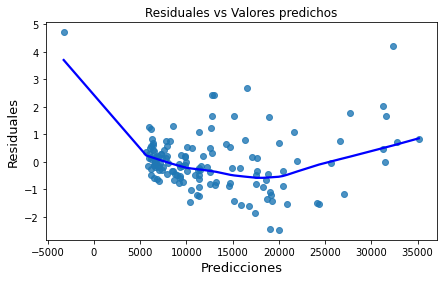

In [265]:
Homocedasticidad(lm_2)

> La grafica no proporciona una evidencia concluyente de que los residuos esten dispersos uniformemente alrededor de la linea cero. Ademas la prueba de Breush Pagan arroja un p-value menor a 0.05 lo que indica que no se cumple con la homocedasticidad. 

> Algunos puntos tienen valores residuales muy altos; un punto entre -3 y 5 hace que el modelo prediga un valor negativo

## Normalidad

Cuando este supuesto es violado, surgen problemas al calcular los intervalos de confianza y diversas pruebas de significancia para los coeficientes. Cuando la distribucion del error se aleja significativamente de la gaussiana, los invervalos de confianza pueden ser demasiado amplios o estrechos. Algunas posibles razones de la anormalidad en los residuos son:

> Presencia de outlier.

> Presencia de otros problemas con los supuestos.

> Otro modelo podria ser mas adecuado para el problema.

Vamos a evaluar la Normalidad de los residuos a traves de un Grafico Q-Q y la prueba estadistica Shapiro Wilk mediante la siguiente funcion:

ShapiroResult(statistic=0.9426702857017517, pvalue=1.340710969088832e-05)


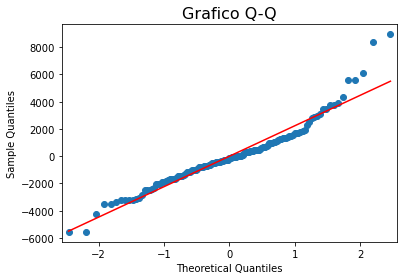

In [266]:
Norm_residuales(lm_2)

> La grafica muestra que los residuales se ajustan muy bien en la mayoria de la diagonal excepto en los extremos. Ademas, el p-value de la prueba es menor a 0.05 lo que indica que no cumple con el supuesto de normalidad.

El motivo de estos resultados podrian ser la presencia de valores atipicos.

## Multicolinealidad
Para evaluar la multicolinealidad entre las variables predictoras, utilizamos la metrica VIF. Si existen variables con valores de VIF mayores a 5 indica que existe relacion entre dichas variables.

In [267]:
Multicolinealidad(X_train_13)

/home/jbernal/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_twelve,cylindernumber_two,car_company_bmw,car_company_porsche
vif,5.731925,9.368196,19.804123,4.396403,2.11901,1.704861,inf,2.422367,7.932701,2.533762,inf,1.240759,1.881701


Los resultados sugieren que existe una estrecha relacion entre las variables
   - carwidth
   - curbweight
   - enginesize
   - cylindernumber_four

# Seccion 10: Identificacion de outliers

Vamos a crear una funcion que determine los limites fuera de los cuales se consideran registros con valores atipicos utilizando el Rango Intercuartilico.

In [268]:
def Outlier_IQR(y_train):
    '''
    Funcion que devuelve los limites fuera de los cuales se consideran outliers
    Requiere como parametro la variable objetivo de entrenamiento
    '''
    
    # calculo de IQR
    pct_25 = y_train.quantile(0.25)
    pct_75 = y_train.quantile(0.75)
    iqr = pct_75 -pct_25
    
    # encontrar limites superior e inferior
    upper_limit = pct_75 + 1.5*iqr
    lower_limit = pct_25 - 1.5*iqr
    
    return lower_limit, upper_limit
    

Veamos cuales son los limites para la variable Price

In [269]:
l_inferior, l_superior = Outlier_IQR(y_train)
print(l_inferior, l_superior)

-5812.5 29831.5


- Como el limite inferior es negativo, indica que no hay outliers en esa direccion.
- Registros con precio mayores a 29831.5 se consideran outliers.

Veamos los registros que se consideran outliers

In [270]:
out_X = X_train_13[(y_train > l_superior) | (y_train < l_inferior)]
out_X

,const,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_twelve,cylindernumber_two,car_company_bmw,car_company_porsche
127,1.0,-0.424215,0.385889,1.615095,1.518397,-1.136123,8.205689,-0.141069,-0.238120,-1.859172,-0.070014,-0.141069,-0.201517,6.324555
16,1.0,0.930947,1.587255,1.976184,1.074252,0.430217,-0.121867,-0.141069,-0.238120,-1.859172,-0.070014,-0.141069,4.962358,-0.158114
48,1.0,1.725353,2.907988,3.155742,1.111264,2.923575,-0.121867,-0.141069,-0.238120,-1.859172,-0.070014,-0.141069,-0.201517,-0.158114
71,1.0,2.706677,2.280351,2.578000,0.482059,-0.496800,-0.121867,-0.141069,-0.238120,-1.859172,-0.070014,-0.141069,-0.201517,-0.158114
70,1.0,2.706677,2.338109,1.350297,0.926204,1.229370,-0.121867,-0.141069,4.199567,-1.859172,-0.070014,-0.141069,-0.201517,-0.158114
72,1.0,2.145920,2.174461,2.578000,0.482059,-0.496800,-0.121867,-0.141069,-0.238120,-1.859172,-0.070014,-0.141069,-0.201517,-0.158114
17,1.0,2.332839,1.827913,1.976184,1.074252,0.430217,-0.121867,-0.141069,-0.238120,-1.859172,-0.070014,-0.141069,4.962358,-0.158114
47,1.0,1.725353,2.907988,3.155742,1.111264,2.923575,-0.121867,-0.141069,-0.238120,-1.859172,-0.070014,-0.141069,-0.201517,-0.158114
49,1.0,2.192650,2.684657,4.792679,0.778156,-1.583648,-0.121867,-0.141069,-0.238120,-1.859172,14.282857,-0.141069,-0.201517,-0.158114
129,1.0,2.987056,1.560301,1.831749,2.258638,-0.464834,-0.121867,-0.141069,-0.238120,-1.859172,-0.070014,-0.141069,-0.201517,6.324555


- Hay 10 registros que se consideran outliers y son carros considerados de alta gama (marca BMW).
- Estos registros representan el 5% del total por lo que debemos tener precaucion al eliminarlos
ya que podriamos estar pediendo informacion valiosa.

Vamos a graficar el precio de los registros considerados outliers para ver que tan distante estan entre si.

In [271]:
# obtener los precios de los outliers
out_y = y_train[out_X.index]
out_y

127    34028.0
16     41315.0
48     35550.0
71     34184.0
70     31600.0
72     35056.0
17     36880.0
47     32250.0
49     36000.0
129    31400.5
Name: price, dtype: float64

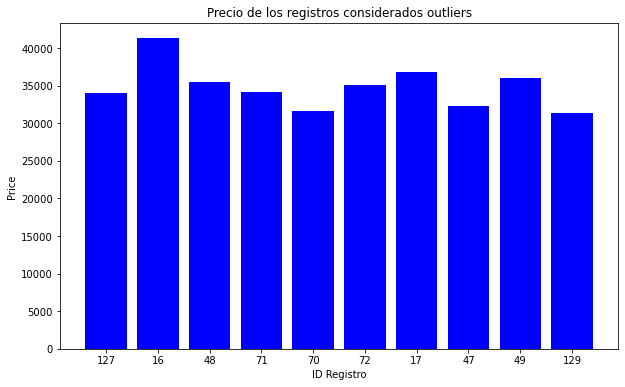

In [272]:
# size de la grafica
plt.figure(figsize=(10, 6))

# Grafico de barra de los precios
plt.bar(np.arange(len(out_y)), out_y.values, color='blue')
# etiquetas personalizadas en el eje x
plt.xticks(range(len(out_y)), out_y.index)
plt.xlabel('ID Registro')
plt.ylabel('Price')
plt.title('Precio de los registros considerados outliers');

- Observamos que el registro 16 sobresale del resto en cuanto a precio, por tanto, es un outlier que podria ser omitido.

# Seccion 11: Deteccion de Puntos de gran Influencia

En esta seccion, vamos a hacer un analisis sobre cada punto para encontrar aquellos que tienen una alta influencia sobre el modelo.

## Leverage

Calculamos el hat value (Leverage) para cada punto y graficamos para visualizar aquellos con altos valores. Los datos con un alto hat values tienen un mayor potencial de influir en los coeficientes de la regresion lineal.

In [273]:
# calculo de hat values
influence = lm_2.get_influence()
hat_values = influence.hat_matrix_diag
hat_values

array([0.03302442, 0.53004336, 0.01942822, 0.09973524, 0.05655422,
       0.01796746, 0.01754342, 0.02478991, 0.08903388, 0.01533182,
       0.021844  , 0.04844099, 0.25042556, 0.02308524, 0.03855941,
       0.01842082, 1.        , 0.02365173, 0.05887482, 0.21980685,
       0.02150318, 0.04790926, 0.06768211, 0.18343196, 0.18208716,
       0.06460089, 0.0281275 , 0.02299018, 0.02150318, 0.01487372,
       0.05198524, 0.01610527, 0.07612381, 0.0490951 , 0.02436842,
       0.027368  , 0.02135459, 0.01571346, 0.0223931 , 0.19690166,
       0.0184776 , 0.02170691, 0.024698  , 0.18072805, 0.13136008,
       0.02043923, 0.02787541, 0.05198524, 0.02509289, 0.02465564,
       0.04882805, 0.05584143, 0.02308524, 0.04048881, 0.25044247,
       0.06614609, 0.024698  , 0.02973686, 0.08169368, 0.01852416,
       0.02874211, 0.02925191, 0.02043923, 0.0630951 , 0.08151047,
       0.01551931, 0.06961184, 0.04055794, 0.03973656, 0.24228902,
       0.14700118, 0.02676794, 0.09971716, 0.01451083, 0.01870

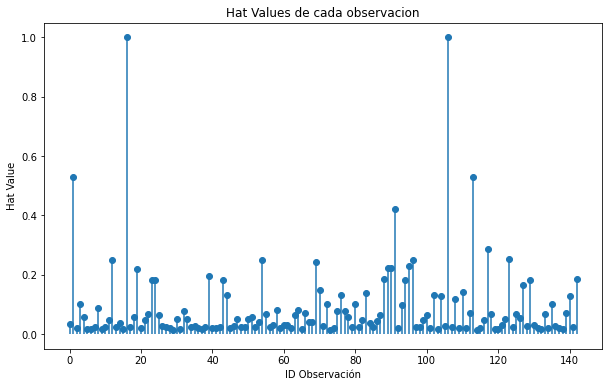

In [274]:
# Grafico de los hat values
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(hat_values)), hat_values, basefmt=" ", use_line_collection=True)
plt.xlabel('ID Observación')
plt.ylabel('Hat Value')
plt.title('Hat Values de cada observacion');

- La grafica nos muestra que hay 5 puntos con valores que se diferencian del resto.

Veamos cuales son estos puntos:

In [275]:
leverage_altos = np.where(hat_values > 0.4)[0]
leverage_altos

array([  1,  16,  91, 106, 113])

- Los 5 puntos con alto leverage son 1, 16, 91, 106 y 113.
- El punto con mayor leverage es 106
- Debemos considerar estos puntos para los siguientes analisis.

### Distancia de Cook
Calculamos la distancia de cook para cada punto. Esta metrica nos ayuda a identificar las observaciones influyentes en el ajuste del modelo combinando el leverage con el tamano del residuo de cada observacion. Vamos a calcular la distancia de cook y a graficar el valor de cada observacion para determinar aquellas con alta influencia.

In [276]:
# calculo de la distancia de cook para cada observacion
influencia = lm_2.get_influence()
cook_d = influencia.cooks_distance[0]
cook_d

/home/jbernal/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


array([2.84844006e-04, 3.61216099e-05, 7.81199045e-04, 2.21381397e-02,
       1.17995808e-02, 7.28081351e-04, 4.21652370e-04, 3.72701822e-05,
       4.52954176e-03, 5.13313936e-04, 2.29470736e-05, 2.41136433e-03,
       6.33008880e-03, 2.66849822e-03, 5.75663683e-04, 2.86667222e-03,
                  nan, 1.50031188e-04, 3.19351776e-02, 1.61932707e-02,
       5.62363471e-05, 2.45651050e-03, 4.11916196e-03, 3.53629582e-02,
       2.83037929e-01, 6.02448278e-03, 6.80725570e-05, 3.72614323e-05,
       2.25281494e-03, 4.61985113e-05, 6.24048016e-05, 2.03571798e-03,
       7.09315075e-03, 1.94997373e-03, 7.26654950e-05, 7.58532629e-04,
       5.93760275e-05, 1.93809055e-05, 3.94962444e-04, 4.10170490e-02,
       2.18622562e-04, 2.91294777e-06, 1.14566109e-04, 6.53500597e-02,
       2.00679962e-03, 1.15086205e-04, 6.10629733e-05, 4.35198147e-04,
       6.04942346e-04, 4.25379582e-04, 1.06564744e-03, 2.37851271e-03,
       2.72680950e-05, 1.70638730e-03, 1.54428919e-02, 1.00752620e-03,
      

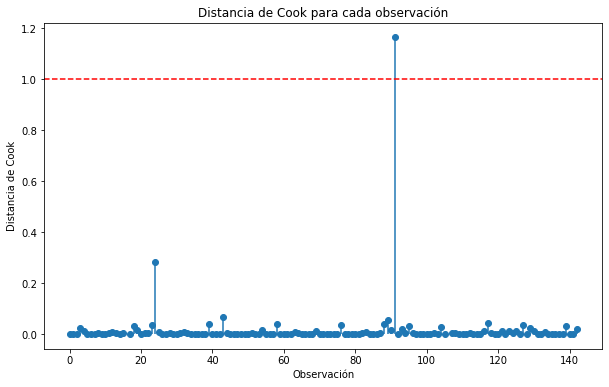

In [277]:
# Visualizar la distancia de Cook
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cook_d)), cook_d, basefmt=" ", use_line_collection=True)
plt.axhline(y=1, color='r', linestyle='--')  # Línea de referencia en y=1
plt.xlabel('Observación')
plt.ylabel('Distancia de Cook')
plt.title('Distancia de Cook para cada observación');

- La grafica muestra dos observaciones con una gran distancia de cook.

Debemos estimar el limite por encima del cual se consideran observaciones influyentes. Esto se realiza de la siguiente forma

In [278]:
# n numero de observaciones, p: numero de variables predictoras
n= X_train_13.shape[0]
p = 13

# calculo del limite 
lim = 4/(n-p-2)
lim = round(lim, 2)

influyentes = np.where(cook_d > lim)[0]
print(f"Observaciones influyentes (distancia de Cook > {lim}): {influyentes}")

Observaciones influyentes (distancia de Cook > 0.03): [ 18  23  24  39  43  58  76  88  89  91  95 117 127 139]


- Existes 14 observaciones que superan el limite, por tanto, son influyentes para el modelo. Sin embargo, al eliminar estas variables debemos considerar que estamos eliminando el 7.5% del total de observaciones lo cual es un gran problema debido a la poca cantidad de datos.
- Para no sesgar el modelo y evitar la perdida de mucha informacion, vamos a considerar solo aquellas observaciones con distancia de cook mas alta, es decir, mayor a 0.2 segun el grafico anterior.

In [279]:
new_lim = 0.2
influyentes = np.where(cook_d > new_lim)[0]
print(f"Observaciones influyentes (distancia de Cook > {new_lim}): {influyentes}")

Observaciones influyentes (distancia de Cook > 0.2): [24 91]


- Las observaciones con distancia de cook alta son 24 y 91.
- Notemos que la observacion 91 es de gran influencia ya que aparece seleccionada en leverage y en distancia de cook.
- Debemos considerar ambas observaciones para el siguiente analisis

### Diagrama de Influencia

Este grafico nos ayuda a identificar las observaciones con gran impacto en el ajuste del modelo considerando la informacion de los residuos estandarizados, el leverage y la distancia de cook. Vamos a crear manualmente este diagrama para identificar las observaciones de gran influencia.

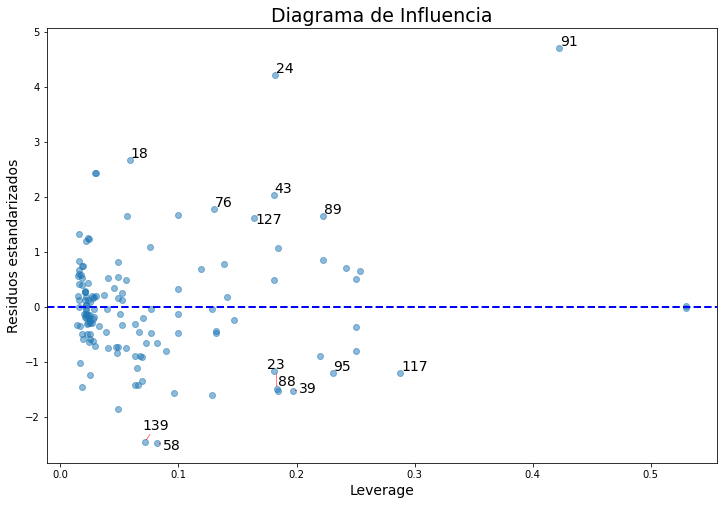

In [280]:
# libreria para evitar superposicion de etiquetas
from adjustText import adjust_text

# convertir cooks_d en un array
if isinstance(cook_d, tuple):
    cook_d = cook_d[0]
# calcular residuos estandarizados internos: residuales/std de residuales
standarized_residuals = influencia.resid_studentized_internal

# Grafico de los residuos estandarizados vs Leverage
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(hat_values, standarized_residuals, alpha=0.5)
ax.set_xlabel('Leverage', fontsize=14)
ax.set_ylabel('Residuos estandarizados', fontsize=14)
ax.set_title('Diagrama de Influencia', fontsize=19)
ax.axhline(0, color='blue', linestyle='--', lw=2)

# Etiquetar observaciones consideradas influyente
# segun la distancia de cook
high_influence_points = np.where(cook_d > lim)[0]
texts = []
for i in high_influence_points:
    texts.append(ax.text(hat_values[i], standarized_residuals[i], str(i), fontsize=14))

# ajuste de las etiqueta para evitar sobreposicion    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5));
                 

El diagrama se interpreta como sigue:
- El punto con mayor leverage (ubicado a la derecha del grafico) es 16. Este valor debe ser eliminado por su influencia significativa en el ajuste del modelo. Ademas es el mismo punto considerado como un outlier debido a su diferencia con el resto, en cuanto al precio.
- Los puntos con mayor residuo son 24 y 91, ambos aparecen en la seleccion de la distancia de cook.
- Los 14 puntos etiquetados corresponde a las observaciones influyentes consideradas por la distancia de cook. Sin embargo, decidimos quedarnos solo con dos de ellas (24 y 19) para evitar perder tanta informacion.

Para concluir, vamos a eliminar las observaciones 6, 24 y 91 de los datos de entrenamiento originales

In [281]:
X_train_no_out = X_train.drop(index=[16,24,91])
y_train_no_out = y_train.drop(index=[16,24,91])

# verificar que se eliminaron las tres observaciones
print('Cantidad de registros antes de la eliminacion: ', X_train_13.shape[0])
print('Cantidad de registros despues de la eliminacion: ', X_train_no_out.shape[0])


Cantidad de registros antes de la eliminacion:  143
Cantidad de registros despues de la eliminacion:  140


# Seccion 11: Construir un modelo con los nuevos datos seleccionando las variables con RFE.

Vamos a determinar el numero optimo de variables con RFE, realizado anteriormente pero esta vez utilizando el nuevo conjunto de datos *X_train_no_out, y_train_no_out*

In [282]:
df_RFE_2 = Modelos_Metricas_RFE(4, 66, X_train_no_out, y_train_no_out, X_test, y_test)
df_RFE_2

,Modelo,R-cuadrado_train,RMSE_train,R-cuadrado_test,RMSE_test,Descripcion
0,4 variables,0.841,2970.537,0.778,3943.683,4
1,5 variables,0.891,2455.040,0.818,3568.392,5
2,6 variables,0.913,2200.192,0.843,3312.605,6
3,7 variables,0.917,2148.398,0.844,3307.871,7
4,8 variables,0.922,2083.031,0.853,3209.592,8
...,...,...,...,...,...,...
57,61 variables,0.982,986.001,0.912,2479.718,61
58,62 variables,0.982,985.388,0.913,2472.642,62
59,63 variables,0.982,985.333,0.912,2476.334,63
60,64 variables,0.983,985.287,0.913,2468.620,64


Una vez que hemos creado los modelos con cantidad de variables desde 4 hasta 66 y obtenido de cada uno sus metricas, vamos a graficar R cuadrado y RMSE en funcion de la cantidad de variables para determinar el numero optimo de variables para el modelo de regresion.

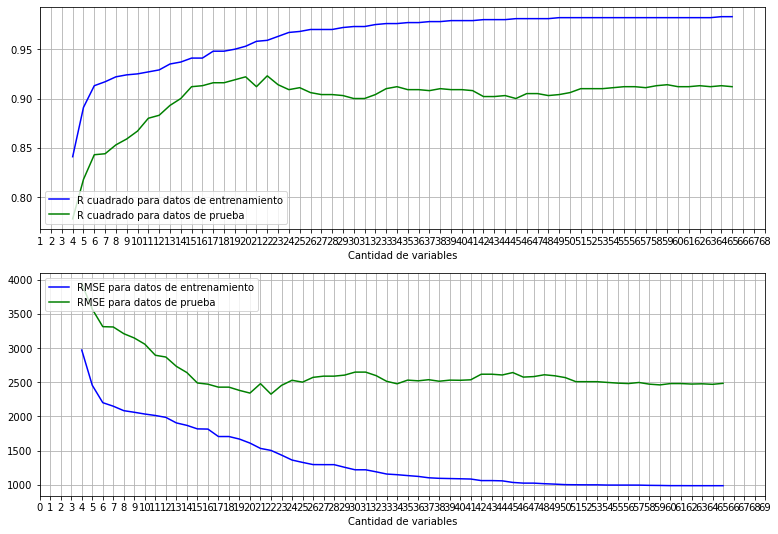

In [283]:
# librerias para personalizar las etiquetas
import matplotlib.ticker as plticker

# grilla
fig, ax = plt.subplots(2, 1, figsize=(13, 9))

# grafico de R cuadrado
ax[0].plot(df_RFE_2['Descripcion'], df_RFE_2['R-cuadrado_train'], 'b', label='R cuadrado para datos de entrenamiento')
ax[0].plot(df_RFE_2['Descripcion'], df_RFE_2['R-cuadrado_test'], 'g', label='R cuadrado para datos de prueba')
ax[0].set_xlabel('Cantidad de variables')
ax[0].legend(loc='lower left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid(True)
# grafico de RMSE
ax[1].plot(df_RFE_2['Descripcion'], df_RFE_2['RMSE_train'], 'b',label="RMSE para datos de entrenamiento")
ax[1].plot(df_RFE_2['Descripcion'], df_RFE_2['RMSE_test'], 'g',label="RMSE para datos de prueba")
ax[1].set_xlabel('Cantidad de variables')
ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 70, step=1))
ax[1].grid(True);

> La diferencia entre R cuadrado y RMSE tanto de prueba como de entrenamiento es muy alta lo que indica un alto sobreajuste que hace que el modelo no generalice bien y por tanto genere malas predicciones. No se puede seleccionar una cantidad optima de variables.

Para remediar el sobreajuste entre los datos de entrenamiento y de prueba, vamos a realizar una validacion cruzada de K-Fold para intentar determinar el numero optimo de caracteristicas a utilizar en el modelo.

# Seccion 13: Aplicando validacion cruzada K-Fold

Vamos a evaluar como varia el rendimiento de un modelo de regresion lineal entrenado con diferentes cantidades de caracteristicas utilizando RFE y dividiendo los datos en subgrupos mediante la validacion cruzada. Las metricas de rendimiento (R cuadrado y RMSE) se calculan para cada numero de caracteristicas.

Pero antes, vamos a preparar los datos antes de implementar la validacion cruzada

In [284]:
# eliminar las observaciones consideradas outliers y puntos de influencia
X_new_cv = dfX_scaled.drop(index=[16,24,91])
y_new_cv = y.drop(index=[16,24,91]) 

In [285]:
# resetear los indices
X_new_cv.reset_index(inplace=True, drop=True)
y_new_cv.reset_index(drop=True,inplace=True)

In [286]:
# validar las dimensiones de las variables predictoras y objetivo
print(X_new_cv.shape,y_new_cv.shape)

(202, 68) (202,)


In [287]:
# libreria para utlizar la validacion cruzada
from sklearn.model_selection import KFold

# definir parametros de la validacion cruzada
K=5 # numero de pliegues

# configurando validacion cruzada
# shuffle para barajar los datos
# semilla para reproducibilidad
kf = KFold(n_splits=K, shuffle=True, random_state=42) 

# crear lista para almacenar las metricas
metrics_list = []

# iterar sobre un rango de 5 a 30 caracteristicas
for n_features in range(4, 66):
    # inicializar las listas que almacenan las metricas
    train_RMSE = []
    test_RMSE = []
    train_r2 = []
    test_r2 = []
    
    # realizar la validacion cruzada dividiedno los datos en conjuntos de entrenamiento y prueba de cada pliegue
    for train, test in kf.split(X_new_cv):
        # creacion del modelo
        lm = LinearRegression()
        # objeto RFE
        rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
        # entrenar el modelo con RFE
        rfe_n.fit(X_new_cv.loc[train], y_new_cv[train])
        
        # calcular predicciones
        y_pred_train = rfe_n.predict(X_new_cv.loc[train])
        y_pred_test = rfe_n.predict(X_new_cv.loc[test])
        
        # Calcular metricas
        # R cuadrado
        train_r2.append(r2_score(y_pred_train, y_new_cv[train]))
        test_r2.append(r2_score(y_pred_test, y_new_cv[test]))
        
        # RMSE
        error_train = y_pred_train - y_new_cv[train]
        error_test = y_pred_test - y_new_cv[test]
        rmse_train = ((error_train**2).mean())**0.5
        rmse_test = ((error_test**2)).mean()**0.5
        
        # guadrar metricas
        train_RMSE.append(rmse_train)
        test_RMSE.append(rmse_test)

    # calcular el cociente de RMSE entre el conjunto de prueba y de entrenamiento
    test_times_train = np.mean(test_RMSE) / np.mean(train_RMSE)
    
  
    metrics_list.append({
        'n_variables': n_features,
        'mean_train_R2': round(np.mean(train_r2), 4),
        'mean_test_R2': round(np.mean(test_r2), 4),
        'mean_rmse_train': round(np.mean(train_RMSE), 0),
        'mean_rmse_test': round(np.mean(test_RMSE), 0),
        'RMSE_test/train': round(test_times_train,2)
    })
    
metrics_df = pd.concat([pd.DataFrame([metrics]) for metrics in metrics_list], ignore_index=True)
metrics_df

,n_variables,mean_train_R2,mean_test_R2,mean_rmse_train,mean_rmse_test,RMSE_test/train
0,4,0.8362,0.7762,2883.0,3.442000e+03,1.190000e+00
1,5,0.8723,0.8138,2595.0,3.180000e+03,1.230000e+00
2,6,0.8917,0.8278,2414.0,3.100000e+03,1.280000e+00
3,7,0.9061,0.8345,2266.0,2.997000e+03,1.320000e+00
4,8,0.9130,0.8380,2188.0,2.964000e+03,1.350000e+00
...,...,...,...,...,...,...
57,61,0.9759,0.5288,1183.0,1.950912e+15,1.649625e+12
58,62,0.9756,0.3460,1192.0,4.144308e+15,3.476527e+12
59,63,0.9756,0.3398,1191.0,4.232692e+15,3.552789e+12
60,64,0.9757,0.3463,1185.0,8.050229e+15,6.792371e+12


El dataframe muestra las metricas de cada modelo con su respectiva cantidad de variables utilizadas para entrenarlo. Ademas, muestra la relacion entre el RMSE de train y test. Ahora vamos a graficar cada metricas para observar el desempeno del modelo segun la cantidad de variables seleccionadas por RFE para en entrenamiento.

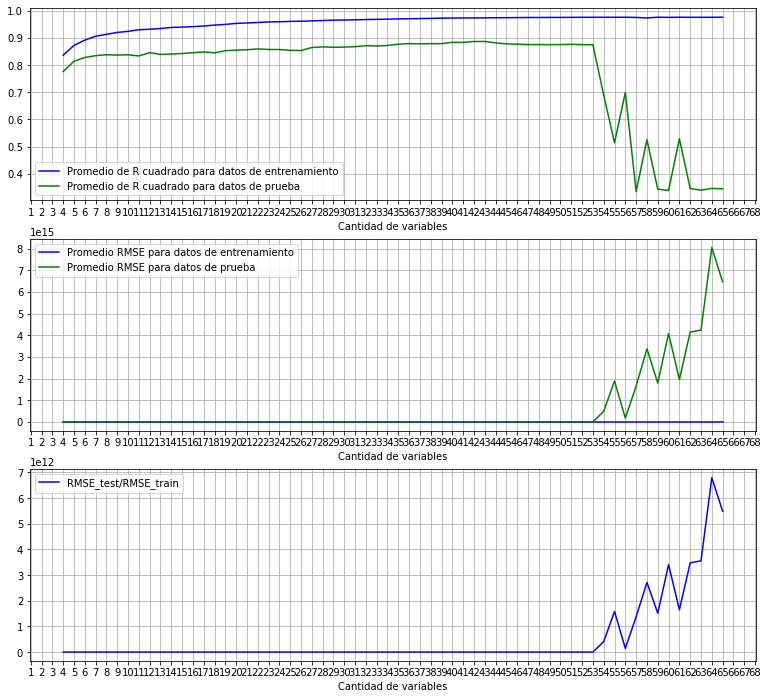

In [288]:
# librerias para personalizar las etiquetas
import matplotlib.ticker as plticker

# grilla
fig, ax = plt.subplots(3, 1, figsize=(13, 12))

# grafico de R cuadrado
ax[0].plot(metrics_df['n_variables'], metrics_df['mean_train_R2'], 'b', label='Promedio de R cuadrado para datos de entrenamiento')
ax[0].plot(metrics_df['n_variables'], metrics_df['mean_test_R2'], 'g', label='Promedio de R cuadrado para datos de prueba')
ax[0].set_xlabel('Cantidad de variables')
ax[0].legend(loc='lower left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid(True)

# grafico de RMSE
ax[1].plot(metrics_df['n_variables'], metrics_df['mean_rmse_train'], 'b',label="Promedio RMSE para datos de entrenamiento")
ax[1].plot(metrics_df['n_variables'], metrics_df['mean_rmse_test'], 'g',label="Promedio RMSE para datos de prueba")
ax[1].set_xlabel('Cantidad de variables')
ax[1].legend(loc='upper left')
ax[1].xaxis.set_major_locator(loc)
ax[1].grid(True)

# grafico rmse_test/rmse_train vs n_variables
ax[2].plot(metrics_df['n_variables'], metrics_df['RMSE_test/train'], 'b',label="RMSE_test/RMSE_train")
ax[2].set_xlabel('Cantidad de variables')
ax[2].legend(loc='upper left')
ax[2].xaxis.set_major_locator(loc)
ax[2].grid(True);

> El modelo se sobreajusta a media que aumentamos el numero de caracteristicas (se refleja en la diferencia entre R cuadrado para datos de prueba y de entrenamiento)

Veamos el comportamiento del modelo cuando se entrena con 4 hasta 13 variables

In [289]:
metrics_df = metrics_df.head(10)
metrics_df

,n_variables,mean_train_R2,mean_test_R2,mean_rmse_train,mean_rmse_test,RMSE_test/train
0,4,0.8362,0.7762,2883.0,3442.0,1.19
1,5,0.8723,0.8138,2595.0,3180.0,1.23
2,6,0.8917,0.8278,2414.0,3100.0,1.28
3,7,0.9061,0.8345,2266.0,2997.0,1.32
4,8,0.9130,0.8380,2188.0,2964.0,1.35
5,9,0.9200,0.8366,2104.0,2953.0,1.40
6,10,0.9239,0.8379,2055.0,2955.0,1.44
7,11,0.9299,0.8334,1975.0,2932.0,1.48
8,12,0.9318,0.8454,1951.0,2854.0,1.46
9,13,0.9343,0.8391,1919.0,2914.0,1.52


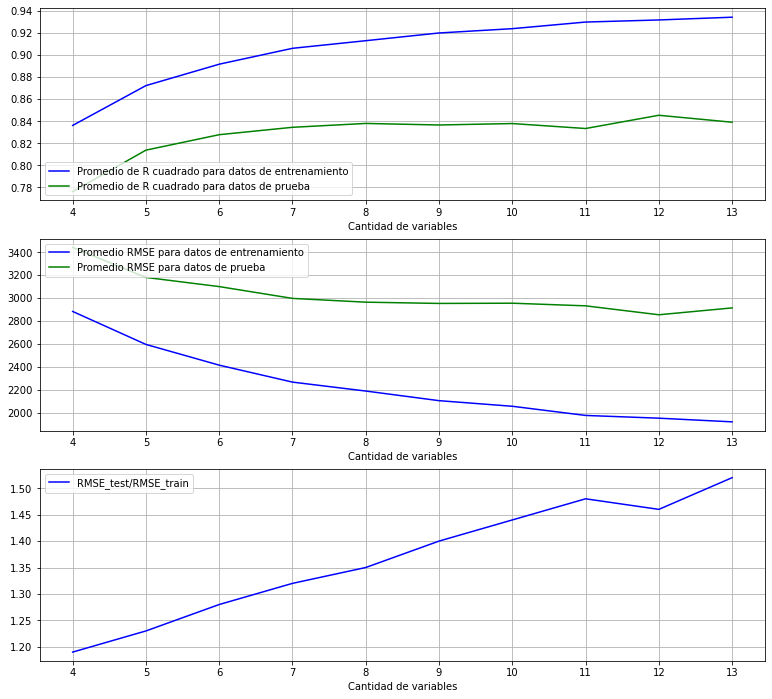

In [290]:
# grilla
fig, ax = plt.subplots(3, 1, figsize=(13, 12))

# grafico de R cuadrado
ax[0].plot(metrics_df['n_variables'], metrics_df['mean_train_R2'], 'b', label='Promedio de R cuadrado para datos de entrenamiento')
ax[0].plot(metrics_df['n_variables'], metrics_df['mean_test_R2'], 'g', label='Promedio de R cuadrado para datos de prueba')
ax[0].set_xlabel('Cantidad de variables')
ax[0].legend(loc='lower left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid(True)

# grafico de RMSE
ax[1].plot(metrics_df['n_variables'], metrics_df['mean_rmse_train'], 'b',label="Promedio RMSE para datos de entrenamiento")
ax[1].plot(metrics_df['n_variables'], metrics_df['mean_rmse_test'], 'g',label="Promedio RMSE para datos de prueba")
ax[1].set_xlabel('Cantidad de variables')
ax[1].legend(loc='upper left')
ax[1].xaxis.set_major_locator(loc)
ax[1].grid(True)

# grafico rmse_test/rmse_train vs n_variables
ax[2].plot(metrics_df['n_variables'], metrics_df['RMSE_test/train'], 'b',label="RMSE_test/RMSE_train")
ax[2].set_xlabel('Cantidad de variables')
ax[2].legend(loc='upper left')
ax[2].xaxis.set_major_locator(loc)
ax[2].grid(True);

> En el modelo con 4 caracteristicas, el rmse_test es un 19% mas que rmse_train, lo que significa que las predicciones sobre los datos de prueba son un 19% mas inexactas. En el modelo con 5 caracteristicas el rmse_test es un 23% mas que rmse_train.

> Para modelos entrenados con mas de 7 caracteristicas, esta diferencia es de mas de 35% lo que supone un desempeno muy pobre, por tanto, el numero optimo de variables debe ser menor a 7

> Si comparamos el R2 de train y test de los modelos con variables menores o iguales 7, podemos quedarnos con 7 variables optimas ya que este arroja un desempeno aeptable.

### Posible explicacion del Sobreajuste

Debido a que solo hay 200 observaciones y un total de 68 caracteristicas, no podemos esperar un modelo muy exacto. Segun Jim Frost por cada caracteristicas debe haber al menos entre 10 y 15 observaciones en un modelo lineal. Esto indica que, como minimo, deben haber 680 observaciones en este caso, las cuales no existen lo que lleva a que cada caracteristica no este adecuadamente representada y esto refleja el bajo sobreajuste.

# Seccion14: Construccion de un modelo con las variables seleccionadas por validacion cruzada

Creamos un modelo de regresion lineal de 7 variables con los datos antes tratados (X_train_no_out, y_train_no_out)

In [291]:
# objeto del modelo
lm = LinearRegression()
# objeto RFE de 7 variables
rfe = RFE(estimator=lm, n_features_to_select=7)
# ajustar el modelo RFE con los datos tratados
rfe.fit(X_train_no_out, y_train_no_out)
# nombre de las variables seleccionadas
col = X_train_no_out.columns[rfe.support_]
# agrupamos las variables selecciondas en los datos de entrenamiento
X_train_7 = X_train_no_out[col]
# agrupamos las variables seleccionadas en los datos de prueba
X_test_7 = X_test[col]
# agregamos la constantes del temrino intercepto
X_test_7 = sm.add_constant(X_test_7, has_constant='add')
X_train_7 = sm.add_constant(X_train_7, has_constant='add')
# entrenamos el modelo con OLS y lo ajustamos
lm_3 = sm.OLS(y_train_no_out, X_train_7).fit()

lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     207.8
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           4.89e-68
Time:                        09:07:17   Log-Likelihood:                -1272.8
No. Observations:                 140   AIC:                             2562.
Df Residuals:                     132   BIC:                             2585.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.323e+04    188.500     70.172      0.000    1.29e+04    1.36e+04
carlength           -2967.1922    480.312     -6.178      0.000   -3917.297   -2017.088
carwidth             3524.7789    412.029      8.555      0.000    2709.744    4339.814
curbweight           5689.3350    447.600     12.711      0.000    4803.939    6574.731
carbody_hatchback    -571.2421    225.079     -2.538      0.012   -1016.470    -126.014
enginelocation_rear  2254.7504    271.647      8.300      0.000    1717.405    2792.096
car_company_bmw      1628.5631    201.560      8.080      0.000    1229.857    2027.269
car_company_peugeot -1150.3348    195.551     -5.883      0.000   -1537.153    -763.516
==============================================================================
Omnibus:                        4.197   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                5.374
Skew:                           0.024   Prob(JB):                       0.0681
Kurtosis:                       3.959   Cond. No.                         5.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Observamos que todos las variables son significativas para el modelo.

Ahora, vamos a calcular las metricas del nuevo modelo

In [292]:
metricas_modelo3 = Metricas_Modelo(lm_3, 'Modelo 3', X_train_7, y_train_no_out, X_test_7, y_test, '7 variables CV')
metricas_modelo3

,Modelo,R-cuadrado_train,RMSE_train,R-cuadrado_test,RMSE_test,Descripcion
0,Modelo 3,0.917,2148.398,0.844,3307.871,7 variables CV


In [293]:
df_Modelos = pd.concat([df_Modelos, metricas_modelo3], ignore_index=True)
df_Modelos

,Modelo,R-cuadrado_train,RMSE_train,R-cuadrado_test,RMSE_test,Descripcion
0,Modelo 1,0.976,1213.002,0.701,4574.108,Todas las variables
1,Modelo 2,0.917,2237.426,0.914,2455.655,13 variables
2,Modelo 3,0.917,2148.398,0.844,3307.871,7 variables CV


# Seccion 15: Multicolinealidad de las variables seleccionadas

calculamos la multicolinealidad de las variables seleccionadas por validacion cruzada y RFE

In [294]:
Multicolinealidad(X_train_7)

,carlength,carwidth,curbweight,carbody_hatchback,enginelocation_rear,car_company_bmw,car_company_peugeot
vif,6.781467,5.176702,6.174391,1.451651,1.037885,1.066971,1.160337


> Curbweight esta altamente correlacionado con Carwidth con un coeficiente de correlacion de 0.87. Ademas su alto valor de VIF (7.6971) nos indica que podemos eliminarla

In [295]:
X_train_6 = X_train_7.loc[:, X_train_7.columns != 'carlength']
X_test_6 = X_test_7.loc[:, X_test_7.columns != 'carlength']
X_train_6.head()

,const,carwidth,curbweight,carbody_hatchback,enginelocation_rear,car_company_bmw,car_company_peugeot
122,1.0,-0.984972,-0.701886,-0.720082,-0.121867,-0.201517,-0.23812
125,1.0,1.117866,0.428245,1.388730,-0.121867,-0.201517,-0.23812
166,1.0,-0.891512,-0.492032,1.388730,-0.121867,-0.201517,-0.23812
1,1.0,-0.844782,-0.014566,-0.720082,-0.121867,-0.201517,-0.23812
199,1.0,0.603839,1.157921,-0.720082,-0.121867,-0.201517,-0.23812


# Seccion 15: Construir un modelo con 6 variables

In [296]:
# ajuste del modelo con 6 caracteristicas
lm_4 = sm.OLS(y_train_no_out, X_train_6).fit()

lm_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           6.14e-62
Time:                        09:07:17   Log-Likelihood:                -1290.6
No. Observations:                 140   AIC:                             2595.
Df Residuals:                     133   BIC:                             2616.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.332e+04    212.511     62.689      0.000    1.29e+04    1.37e+04
carwidth             2489.1813    425.736      5.847      0.000    1647.093    3331.270
curbweight           4294.8322    437.187      9.824      0.000    3430.094    5159.571
carbody_hatchback      88.6885    224.089      0.396      0.693    -354.550     531.927
enginelocation_rear  2455.6447    305.055      8.050      0.000    1852.258    3059.032
car_company_bmw      1483.6914    226.439      6.552      0.000    1035.803    1931.580
car_company_peugeot -1331.9464    218.677     -6.091      0.000   -1764.480    -899.412
==============================================================================
Omnibus:                        6.052   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.653
Skew:                           0.415   Prob(JB):                       0.0592
Kurtosis:                       3.531   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> carbody_hatchback no es significativa para el modelo por lo que debemos omitirla.

Vamos a evaluar la multicolinealidad de las variables

In [297]:
Multicolinealidad(X_train_6)

,carwidth,curbweight,carbody_hatchback,enginelocation_rear,car_company_bmw,car_company_peugeot
vif,4.319794,4.603996,1.124653,1.023011,1.052527,1.134113


> No se presenta alta multicolinealidad entre las variables.

Eliminamos carbody_hatchback para entrenar un nuevo modelo

In [298]:
X_train_5 = X_train_6.loc[:, X_train_6.columns != 'carbody_hatchback']
X_test_5 = X_test_6.loc[:, X_test_6.columns != 'carbody_hatchback']
X_train_5.head()

,const,carwidth,curbweight,enginelocation_rear,car_company_bmw,car_company_peugeot
122,1.0,-0.984972,-0.701886,-0.121867,-0.201517,-0.23812
125,1.0,1.117866,0.428245,-0.121867,-0.201517,-0.23812
166,1.0,-0.891512,-0.492032,-0.121867,-0.201517,-0.23812
1,1.0,-0.844782,-0.014566,-0.121867,-0.201517,-0.23812
199,1.0,0.603839,1.157921,-0.121867,-0.201517,-0.23812


# Seccion : Construir un modelo con 5 variables

In [299]:
# ajuste del modelo con 6 caracteristicas
lm_5 = sm.OLS(y_train_no_out, X_train_5).fit()

lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           4.22e-63
Time:                        09:07:17   Log-Likelihood:                -1290.7
No. Observations:                 140   AIC:                             2593.
Df Residuals:                     134   BIC:                             2611.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.332e+04    211.834     62.886      0.000    1.29e+04    1.37e+04
carwidth             2498.1209    423.796      5.895      0.000    1659.926    3336.316
curbweight           4266.5413    429.944      9.923      0.000    3416.187    5116.896
enginelocation_rear  2449.2147    303.662      8.066      0.000    1848.624    3049.805
car_company_bmw      1473.5282    224.270      6.570      0.000    1029.962    1917.094
car_company_peugeot -1341.3669    216.692     -6.190      0.000   -1769.946    -912.787
==============================================================================
Omnibus:                        5.997   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.627
Skew:                           0.405   Prob(JB):                       0.0600
Kurtosis:                       3.555   Cond. No.                         4.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Todas las variables son significativas para el modelo

Evaluamos nuevamente la multicolinealidad

In [300]:
Multicolinealidad(X_train_5)

,carwidth,curbweight,enginelocation_rear,car_company_bmw,car_company_peugeot
vif,4.307634,4.480913,1.020109,1.038991,1.120676


Generamos las predicciones del modelo para luego usarlas para visualizar su desempeno

In [301]:
y_prediccion = lm_5.predict(X_train_5)

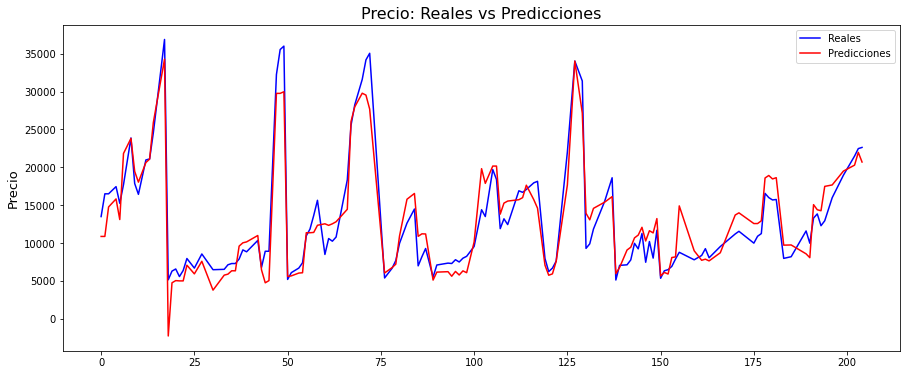

In [302]:

fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x=y_train_no_out.index, y=y_train_no_out, label='Reales', color='blue', ax=ax)
sns.lineplot(x=y_train_no_out.index, y=y_prediccion, label='Predicciones', color='red', ax=ax)
ax.set_title('Precio: Reales vs Predicciones', fontsize=16)
ax.set_ylabel('Precio', fontsize=13);

> El grafico muestra que las predicciones omiten los valores reales en ciertas zonas y es el precio a pagar para que el modelo generalice bien y funcione correctamente con datos nuevos (compensacion de sesgo-varianza)

# Seccion 16: Evaluacion de supuestos para el nuevo modelo

## Media de los residuales

In [303]:
Med_residual(lm_5)

-1.2473070195743015e-11


## Linealidad

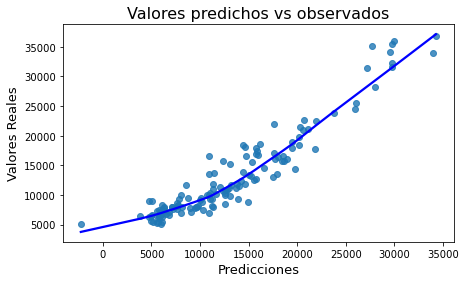

In [304]:
Linealidad(lm_5, y_train_no_out)

> El comportamiento lineal es mucho mejor en este modelo.

## Normalidad

ShapiroResult(statistic=0.983685314655304, pvalue=0.09433040767908096)


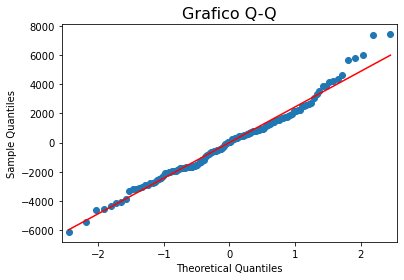

In [305]:
Norm_residuales(lm_5)

## Homocedasticidad


Breush - Pagan Test: p-value= 0.00040675929563680705


/home/jbernal/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


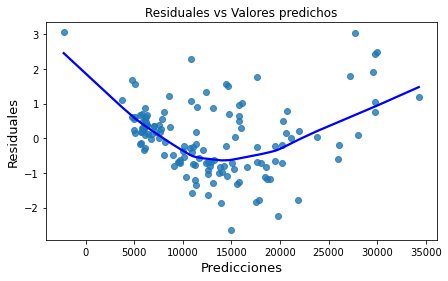

In [306]:
Homocedasticidad(lm_5)